In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Markdown

Нам предстоит  исследовать датасет задержек авиарейсов из Нью-Йорка в 2013 году.

Наша задача - предоставить отчет, раскрывающий характер и особенности задержек рейсов и способствующий принятию решений руководством аэропортов.

Наши действующие в этом году аэропорта:

John F. Kennedy International Airport (JFK)

LaGuardia Airport (LGA)

Newark International Airport (EWR)

In [0]:
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
df = pd.read_csv(url1, sep=',')
dw =  pd.read_csv(url2, sep=',')


In [103]:
df.head(8)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0


In [104]:
len (df), df.shape
df.tail ()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [105]:
df.columns 

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [106]:
dw.head(8)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0


# Зависимость задержок относительно месяца(1)

Здесь мы видим сумму задержок по времени вылета самолётов.

In [107]:
filtered_df=df[df.dep_delay>0]
data=pd.DataFrame(filtered_df.groupby([filtered_df.month])['dep_delay'].size().reset_index(name='Count'))
print(data)

    month  Count
0       1   9662
1       2   9124
2       3  11209
3       4  10543
4       5  11291
5       6  12655
6       7  13909
7       8  11713
8       9   7815
9      10   8722
10     11   8239
11     12  13550


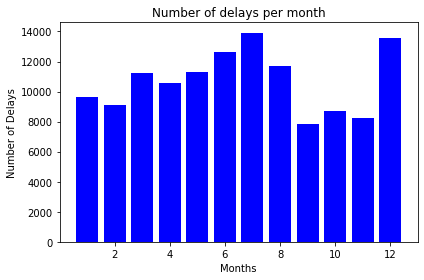

In [108]:

plt.bar(data.month, data.Count, color="blue")
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per month')
plt.tight_layout()
plt.show()

Мы видим что самое большое количество задержек в 7, 12, 6, 3, 5 месяце, а точнее в июле, декабре, июне, марте и в августе. Т.е. в то время, когда количество пассажиров в аэропорту значительно увеличивается.

Можно посоветовать аэропортам в эти месяцы побольше  побольше заключать сделок с авиакомпаниями на перевозки пассажиров. И делать минимизацию очередей в аэропорту.

# Зависимость задержок относительно перевозщика(2,3)

   carrier   Mean_arr  Count  Total_count  Persentage_of_delayed_aircrafts
0       9E  60.576261   5055        18460                        27.383532
1       AA  53.099880   6668        32729                        20.373369
2       AS  45.416000    125          714                        17.507003
3       B6  51.587613  16436        54635                        30.083280
4       DL  53.057772  10126        48110                        21.047599
5       EV  58.536621  19183        54173                        35.410629
6       F9  63.578125    256          685                        37.372263
7       FL  51.943001   1386         3260                        42.515337
8       HA  72.405405     37          342                        10.818713
9       MQ  54.632921   6944        26397                        26.306020
10      OO  74.625000      8           32                        25.000000
11      UA  44.394737  16606        58665                        28.306486
12      US  44.964409   3

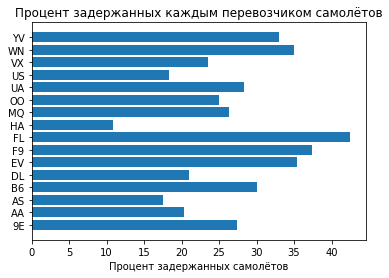

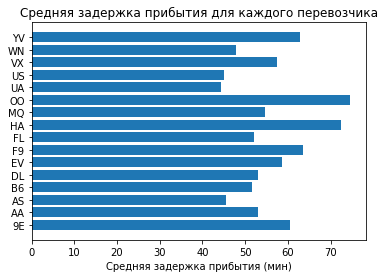

In [109]:
filtered_df=df[(df.dep_delay>0)&(df.arr_delay>0)]

filtered_data_dep_delay=pd.DataFrame(filtered_df.groupby([filtered_df.carrier])['dep_delay'].size().reset_index(name='Count'))
filtered_data_arr_delay=pd.DataFrame(filtered_df.groupby([filtered_df.carrier])['arr_delay'].mean().reset_index(name='Mean_arr'))
data_dep_delay=pd.DataFrame(df.groupby([df.carrier])['dep_delay'].size().reset_index(name='Total_count'))
data_arr_delay=pd.DataFrame(df.groupby([df.carrier])['arr_delay'].size().reset_index(name='Total_count'))
data_merged_dep_delay = pd.merge(filtered_data_dep_delay,data_dep_delay, on=['carrier'])
data_merged_arr_delay = pd.merge(filtered_data_arr_delay,data_arr_delay, on=['carrier'])
data_merged_dep_delay['Persentage_of_delayed_aircrafts']=(data_merged_dep_delay.Count/data_merged_dep_delay.Total_count)*100
data_merged = pd.merge(filtered_data_arr_delay, data_merged_dep_delay, on= ['carrier'])
print(data_merged)

objects = data_merged.carrier
plt.barh(data_merged.carrier, data_merged.Persentage_of_delayed_aircrafts, align='center', alpha=1.0)
plt.yticks(data_merged.carrier, objects)
plt.xlabel('Процент задержанных самолётов')
plt.title('Процент задержанных каждым перевозчиком самолётов')
plt.show()
objects = data_merged.carrier
plt.barh(data_merged.carrier, data_merged.Mean_arr, align='center', alpha=1.0)
plt.yticks(data_merged.carrier, objects)
plt.xlabel('Средняя задержка прибытия (мин)')
plt.title('Средняя задержка прибытия для каждого перевозчика')
plt.show()

Мы видим что плохо свою работу выполняют 5 перевозщиков(большое количество задержанных самолётов):YV, WN, FL, F9, EV. 

А самое большая средняя задержка прибытия у OO,HA, YV, F9, EV, VX.

Можно посоветовать аэропорту уменнить количество сделок на перевозки с YV, F9 и EV.

# Зависимость от времени отправления самолёта(4,5)

    hour  Mean_delay_departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    4.0             -5.554098
5    5.0             -4.355644
6    6.0             -1.520552
7    7.0              0.223289
8    8.0              1.091432
9    9.0              4.268295
10  10.0              5.548644
11  11.0              5.652309
12  12.0              7.601892
13  13.0              9.380639
14  14.0              8.090381
15  15.0             10.682049
16  16.0             13.621150
17  17.0             16.756593
18  18.0             18.664671
19  19.0             21.497342
20  20.0             28.266213
21  21.0             42.064964
22  22.0             68.190042
23  23.0             96.946865
24  24.0             64.862069


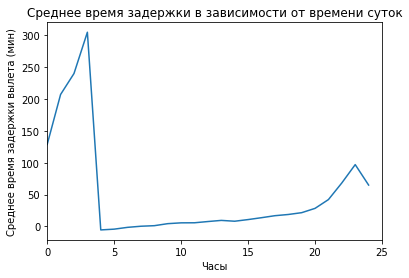

In [111]:
grouped_df = pd.DataFrame(df.groupby(df.hour)['dep_delay'].mean().reset_index(name='Mean_delay_departure'))
print(grouped_df)
plt.plot(grouped_df.hour, grouped_df.Mean_delay_departure,'')
plt.xlim(0, 25)
plt.ylabel('Среднее время задержки вылета (мин)')
plt.xlabel('Часы')
plt.title('Среднее время задержки в зависимости от времени суток')
plt.show()

Здесь мы видим что задержки растут с 20:00 до 05:00. Отсюда предполагаем, что рейсы осуществляются в основном в это 
время. Проверим это.

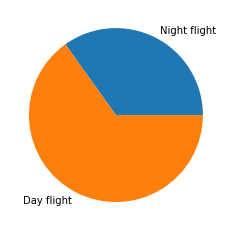

In [112]:
night_df=df.loc[(df['hour']>=20.0) | (df['hour']<=8.0)]
day_df=df.loc[(df['hour']<20.0) & (df['hour']>8.0)]
day_value=day_df.shape[0]
night_value=night_df.shape[0]
data = [night_value,day_value]
plt.pie (data,labels=['Night flight','Day flight'])
plt.show()

Здесь мы видем что наше предположение оказалось не верным.

Предположим, что на задержки влияет именно ночное время.

Давайте посмотрим в процентном сооотношении, какая часть вылетов задеживается относительно времени отправления.

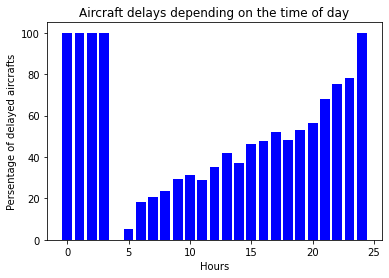

In [113]:
filtered_df=df[df.dep_delay>0]
filtered_data=pd.DataFrame(filtered_df.groupby([filtered_df.hour])['dep_delay'].size().reset_index(name='Count'))
data=pd.DataFrame(df.groupby([df.hour])['dep_delay'].size().reset_index(name='Total_count'))
data_merged = pd.merge(filtered_data,data, on=['hour'])
data_merged['Persentage_of_delayed_aircrafts']=(data_merged.Count/data_merged.Total_count)*100
plt.bar(data_merged.hour, data_merged.Persentage_of_delayed_aircrafts, color='blue')
plt.ylabel('Persentage of delayed aircrafts')
plt.xlabel('Hours')
plt.title('Aircraft delays depending on the time of day')
plt.show()

Здесь мы видем что с 23:00 до 04:00 процент задержок составляет 100% а до этого с 20:00 до 23:00 возрастает. Наше предположение оказалось верным.

# Зависимость от полной доли количества задержек(6)

In [114]:
filtered_df=df[(df.dep_delay>0)&(df.arr_delay>0)]

filtered_data_dep_delay=pd.DataFrame(filtered_df.groupby([filtered_df.tailnum])['dep_delay'].size().reset_index(name='Count'))
filtered_data_arr_delay=pd.DataFrame(filtered_df.groupby([filtered_df.tailnum])['arr_delay'].mean().reset_index(name='Mean_arr'))
data_dep_delay=pd.DataFrame(df.groupby([df.tailnum])['dep_delay'].size().reset_index(name='Total_count'))
data_arr_delay=pd.DataFrame(df.groupby([df.tailnum])['arr_delay'].size().reset_index(name='Total_count'))
data_merged_dep_delay = pd.merge(filtered_data_dep_delay,data_dep_delay, on=['tailnum'])
data_merged_arr_delay = pd.merge(filtered_data_arr_delay,data_arr_delay, on=['tailnum'])
data_merged_dep_delay['Persentage_of_delayed_tailnum']=(data_merged_dep_delay.Count/data_merged_dep_delay.Total_count)*100
data = pd.merge(filtered_data_arr_delay, data_merged_dep_delay, on= ['tailnum'])
data = data.loc[(data.Persentage_of_delayed_tailnum == 100)]
data

,tailnum,Mean_arr,Count,Total_count,Persentage_of_delayed_tailnum
119,N136DL,146.0,1,1,100.0
565,N26906,19.0,1,1,100.0
652,N302AS,29.0,1,1,100.0
655,N303AS,46.0,1,1,100.0
721,N32626,5.0,1,1,100.0
...,...,...,...,...,...
3557,N928DN,201.0,1,1,100.0
3579,N932DN,17.0,1,1,100.0
3586,N933DN,60.0,1,1,100.0
3608,N937DN,87.0,1,1,100.0


In [115]:
data = data.loc[(data.Persentage_of_delayed_tailnum == 100)&(data.Total_count != 1)]
data

,tailnum,Mean_arr,Count,Total_count,Persentage_of_delayed_tailnum
1050,N383SW,13.000000,4,4,100.0
1817,N524SW,56.000000,2,2,100.0
2209,N601WN,5.000000,2,2,100.0
2359,N634SW,20.500000,2,2,100.0
2365,N635SW,32.200000,5,5,100.0
2412,N644UA,56.000000,2,2,100.0
2430,N648SW,15.000000,2,2,100.0
2450,N652UA,16.500000,2,2,100.0
2492,N660UA,25.333333,3,3,100.0
2506,N663UA,18.750000,4,4,100.0


Здесь мы видим что почти все самолёты, а именно 55 из 70 летали всего лишь один раз за год.

# Зависимость задержок вылетов самолёта относительно ветра(7)

    wind_speed  Count_days_with_same_wind  dep_delay
0      0.00000                       8964   109010.0
1      3.45234                       7770    89207.0
2      4.60312                       9578   127841.0
3      5.75390                      10844   157888.0
4      6.90468                      10892   185543.0
5      8.05546                      10098   161873.0
6      9.20624                      10351   192501.0
7     10.35702                       8750   148415.0
8     11.50780                       8263   160959.0
9     12.65858                       7044   144784.0
10    13.80936                       5842   124249.0
11    14.96014                       4747   105691.0
12    16.11092                       3449    87214.0
13    17.26170                       2864    72225.0
14    18.41248                       2293    49629.0
15    19.56326                       1287    28328.0
16    20.71404                       1129    26547.0
17    21.86482                        958    2

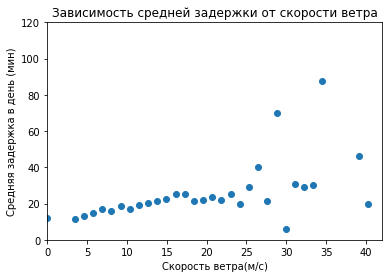

In [116]:
dw_and_df_merged = pd.merge(df,dw, on=['origin','day','month','hour'])
dw_and_df_merged =  dw_and_df_merged[['dep_delay','wind_speed']] 
filtered_data=dw_and_df_merged[dw_and_df_merged.dep_delay>0]
times = dw_and_df_merged.groupby('wind_speed')['dep_delay'].size().reset_index(name='Count_days_with_same_wind')
summ = filtered_data.groupby('wind_speed')['dep_delay'].sum()
times_summ_merged = pd.merge(times, summ, on=['wind_speed'])
print(times_summ_merged)

times_summ_merged_mean=times_summ_merged.dep_delay/times_summ_merged.Count_days_with_same_wind
plt.scatter(times_summ_merged.wind_speed,times_summ_merged_mean)
plt.xlim(0, 42)
plt.ylim(0, 120)
plt.ylabel('Средняя задержка в день (мин)')
plt.xlabel('Скорость ветра(м/с)')
plt.title('Зависимость средней задержки от скорости ветра')
plt.show()


Здесь видно что до 25 м/с среднее время задержок в день примерно одинаковая, а потом идёт резкое повышение задержок. 

# Зависимость от видимости(8)

In [0]:
filtered_df=df[df.dep_delay>0]
groupby_for_analys = filtered_df.groupby([filtered_df.origin, filtered_df.month, filtered_df.day, filtered_df.hour])
grouped_origin_time_hour = groupby_for_analys['dep_delay'].agg([np.size, np.mean]).reset_index()
dw_and_df_merged = pd.merge(grouped_origin_time_hour,dw, on=['origin','day','month','hour'])
dw_and_df_merged = dw_and_df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
visib_df_dw = dw_and_df_merged.groupby([dw_and_df_merged.visib])['TotalDelay','Count' ].agg([np.mean]).reset_index()

    visib  TotalDelay      Count
                 mean       mean
0    0.12   53.125926   9.333333
1    0.25   50.368918   9.266667
2    0.50   48.025944   8.081081
3    0.75  108.043222  10.375000
4    1.00   44.052121   8.615385
5    1.25   99.533333  15.000000
6    1.50   57.758718  10.785714
7    1.75  106.130952   7.000000
8    2.00   53.179340  10.566265
9    2.50   57.614434   9.750000
10   3.00   43.960403  11.780488
11   4.00   44.990879   9.128571
12   5.00   45.245112  10.178947
13   6.00   45.309186   7.691729
14   7.00   42.906023   8.536000
15   8.00   41.097958   8.829268
16   9.00   46.031925   9.126394
17  10.00   36.867483   7.761381


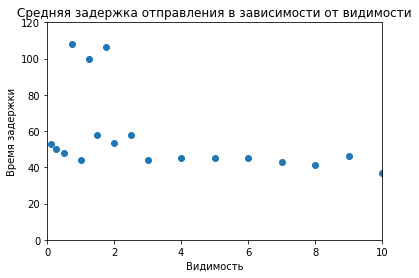

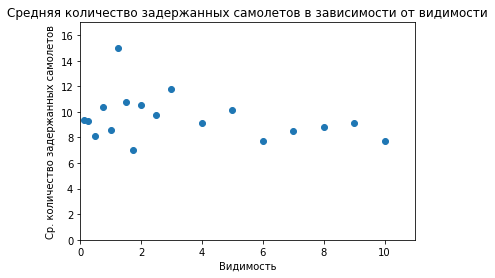

In [118]:
print(visib_df_dw)
plt.xlim(0, 10)
plt.ylim(0, 120)
plt.scatter(visib_df_dw.visib,visib_df_dw.TotalDelay)
plt.ylabel('Время задержки')
plt.xlabel('Видимость')
plt.title('Средняя задержка отправления в зависимости от видимости')
plt.show()

plt.xlim(0, 11)
plt.ylim(0, 17)
plt.scatter(visib_df_dw.visib,visib_df_dw.Count)
plt.ylabel('Ср. количество задержанных самолетов')
plt.xlabel('Видимость')
plt.title('Средняя количество задержанных самолетов в зависимости от видимости')
plt.show()

Здесь мы видим что задержки самолётов в зависимости от видимости возрастает при видимости меньше 3-х.

# Зависимость от осадков(9)

In [0]:
filtered_df=df[df.dep_delay>0]
groupby_for_analys = filtered_df.groupby([filtered_df.origin, filtered_df.month, filtered_df.day, filtered_df.hour])
grouped_origin_time_hour = groupby_for_analys['dep_delay'].agg([np.size, np.mean]).reset_index()
dw_and_df_merged = pd.merge(grouped_origin_time_hour,dw, on=['origin','day','month','hour'])
dw_and_df_merged = dw_and_df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
precip_df_dw = dw_and_df_merged.groupby([dw_and_df_merged.precip])['TotalDelay','Count' ].agg([np.mean]).reset_index()


   precip  TotalDelay      Count
                 mean       mean
0    0.00   37.831159   7.876280
1    0.01   50.225159  10.149123
2    0.02   54.374620  10.837838
3    0.03   39.508620  10.906977
4    0.04   68.867176  10.960000
5    0.05   53.860674  11.409091
6    0.06   49.590391   9.736842
7    0.07   39.614199  12.083333
8    0.08   96.155163  10.777778
9    0.09   44.625427   8.923077
10   0.10   46.664502   9.714286
11   0.11   91.267366   9.200000
12   0.12   39.655462   9.500000
13   0.13   38.672340  15.166667
14   0.14   38.395388  12.250000
15   0.15   30.660539  11.750000
16   0.16   47.965368  12.800000
17   0.17   94.438889   7.666667
18   0.18  312.000000   1.000000
19   0.19   70.568571   8.400000
20   0.22   20.333333  12.000000
21   0.23   50.937500  16.000000
22   0.24   39.666667   9.000000
23   0.25   39.666667   9.000000
24   0.26    4.666667   3.000000
25   0.28   18.083333  12.000000
26   0.29   35.285714  21.000000
27   0.32   12.250000   4.000000
28   0.33 

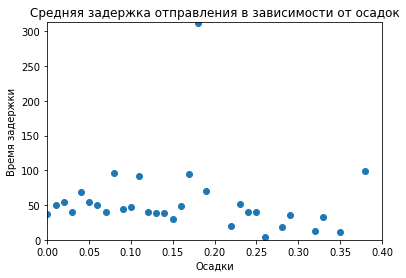

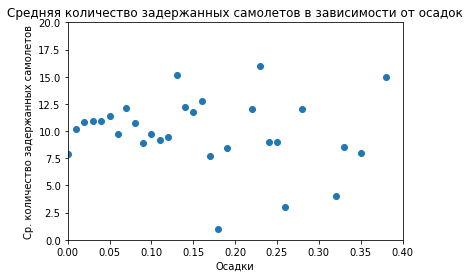

In [120]:
print(precip_df_dw)
plt.xlim(0, 0.4)
plt.ylim(0, 313)
plt.scatter(precip_df_dw.precip,precip_df_dw.TotalDelay)
plt.ylabel('Время задержки')
plt.xlabel('Осадки')
plt.title('Средняя задержка отправления в зависимости от осадок')
plt.show()

plt.xlim(0, 0.4)
plt.ylim(0, 20)
plt.scatter(precip_df_dw.precip,precip_df_dw.Count)
plt.ylabel('Ср. количество задержанных самолетов')
plt.xlabel('Осадки')
plt.title('Средняя количество задержанных самолетов в зависимости от осадок')
plt.show()

Здесь мы видим что среднее количество задержанных самолетов примерно одинаковое до 0.10 осадков, а потом растёт

#  Зависимость от точки росы(10)

In [0]:
filtered_df=df[df.dep_delay>0]
groupby_for_analys = filtered_df.groupby([filtered_df.origin, filtered_df.month, filtered_df.day, filtered_df.hour])
grouped_origin_time_hour = groupby_for_analys['dep_delay'].agg([np.size, np.mean]).reset_index()
dw_and_df_merged = pd.merge(grouped_origin_time_hour,dw, on=['origin','day','month','hour'])
dw_and_df_merged = dw_and_df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
dewp_df_dw = dw_and_df_merged.groupby([dw_and_df_merged.dewp])['TotalDelay','Count' ].agg([np.mean]).reset_index()

      dewp TotalDelay      Count
                 mean       mean
0    -9.04  69.833333  12.000000
1    -7.96  34.845238  12.500000
2    -7.06  49.692821  15.500000
3    -5.98  73.069256   8.692308
4    -5.08  58.174454  11.800000
..     ...        ...        ...
120  73.40  52.754720   9.522727
121  73.94  56.074961   9.958333
122  75.02  48.201586   8.888889
123  75.20  73.098363   9.250000
124  75.92  19.487868   8.857143

[125 rows x 3 columns]


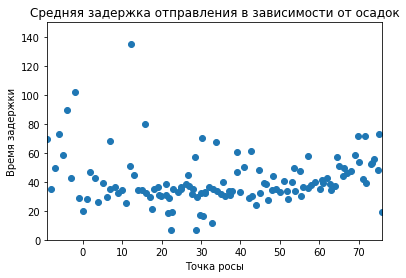

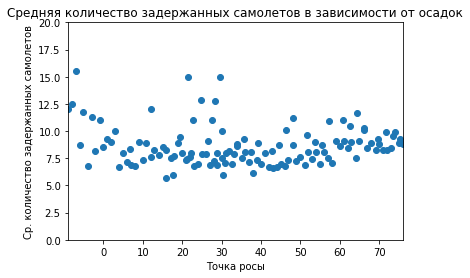

In [124]:
print(dewp_df_dw)
plt.xlim(min(dewp_df_dw.dewp),max(dewp_df_dw.dewp))
plt.ylim(0, 150)
plt.scatter(dewp_df_dw.dewp,dewp_df_dw.TotalDelay)
plt.ylabel('Время задержки')
plt.xlabel('Точка росы')
plt.title('Средняя задержка отправления в зависимости от осадок')
plt.show()

plt.xlim(min(dewp_df_dw.dewp),max(dewp_df_dw.dewp))
plt.ylim(0, 20)
plt.scatter(dewp_df_dw.dewp,dewp_df_dw.Count)
plt.ylabel('Ср. количество задержанных самолетов')
plt.xlabel('Точка росы')
plt.title('Средняя количество задержанных самолетов в зависимости от осадок')
plt.show()

Здесь мы видим что задержки примерно одинаковые каким бы не была точка росы.